# Resolución de Business Case - Jr Data Analyst

En este notebook se presentará la resolución del caso de negocio planteado por la empresa NocNoc de Uruguay. A continuación, se encontrará desde la importación de librerías y la lectura del archivo, hasta la resolución de cada consigna con su justificación y enunciado.

## Importamos las librerías necesarias 📚

In [1]:
import pandas as pd
import Funciones as Funciones
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

## Lectura de archivos 📂🔄

In [2]:
order = pd.read_excel('../Datasets/bc_orders_dataset_modif.xlsx')
customer = pd.read_excel('../Datasets/bc_customers_dataset_modif.xlsx')

In [3]:
order.head()

,order_id,customer_id,order_status,order_approved_at,order_received_by_local_operator_date,order_delivered_to_customer_date,order_delivery_promise_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [4]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_municipality,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-----

## Desarrollo de consignas

## 1) ¿Cuál es el tiempo promedio de entrega para todas las órdenes?  

In [5]:
df_promedio = pd.DataFrame({ 'fecha_entrega': order['order_delivered_to_customer_date'],
'fecha_aprobacion': order['order_approved_at'] })

df_promedio['duracion'] = df_promedio['fecha_entrega'] - df_promedio['fecha_aprobacion']

df_promedio['duracion'] = df_promedio['duracion'].dt.days

df_promedio = df_promedio.dropna(subset=['duracion'])

df_promedio['duracion'] = df_promedio['duracion'].astype(int)

print(f"El tiempo promedio de una entrega es de {round(df_promedio['duracion'].mean())} días")


El tiempo promedio de una entrega es de 12 días


Se creó un nuevo DataFrame tomando dos columnas ('order_delivered_to_customer_date' y 'order_approved_at') del DataFrame de órdenes. Luego, se creó una nueva columna ('Duración') que resulta de la resta entre la fecha de entrega y la fecha de aprobación.

Esta columna inicialmente mostraba valores con horas, minutos y segundos, por lo que se decidió convertir estos valores al total de días que representaban. Se eliminaron los valores nulos, que representan el 2,84% del total, ya que no es útil tener valores a los que se les pueda restar nada, dado que nunca fueron entregados. Luego de convertir la columna a tipos de datos enteros para una mejor legibilidad, se calculó el promedio de dicha columna, resultando en 11,64 días, lo que se podría redondear a 12 días para simplificar el trabajo con este número.

**Respuesta: el tiempo promedio de entrega es de 12 días.**

## 2) Calcula los percentiles 75 y 90 del tiempo de entrega e interpreta los resultados. ¿Crees que es relevante incluir percentiles junto con el promedio en este análisis? ¿Por qué o por qué no?

Se realiza una revisión de los tres percentiles más comunes con la función describe de pandas, la cual nos permite ver información rápidamente sobre la columna.

In [6]:
df_promedio['duracion'].describe()

count    96462.000000
mean        11.642968
std          9.520747
min         -7.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: duracion, dtype: float64

In [7]:
print(f"El percentil de 75 de tiempo de entrega es: {round(df_promedio['duracion'].quantile(0.75))} días")
print(f"El percentil de 90 de tiempo de entrega es: {round(df_promedio['duracion'].quantile(0.90))} días")

El percentil de 75 de tiempo de entrega es: 15 días
El percentil de 90 de tiempo de entrega es: 22 días


**Interpretación**

Luego de realizar el cálculo de los percentiles, se entiende que:

- La distribución de nuestros datos está sesgada hacia la derecha dado que, en una distribución normal, los valores de los percentiles suelen estar cerca de la mediana (9 días). Este no es el caso aquí, ya que nuestro promedio (12 días) está por encima de la mediana. Al comparar el promedio con los percentiles 75 (15 días) y 90 (22 días), observamos una diferencia significativa entre el promedio y estos percentiles superiores. Esta diferencia indica que hay una proporción considerable de entregas que están tomando mucho más tiempo de lo esperado, lo cual es característico de una distribución sesgada hacia la derecha.

- El 75% de los valores se encuentran por debajo o son iguales a 15 días de tiempo de entrega, lo que nos indica que lo más "común" en las entregas es que demoren como máximo 15 días.

- El 90% de los valores se encuentran por debajo o son iguales a 22 días de tiempo de entrega. Este percentil nos indica que tenemos un 10% de entregas que están demorando mucho más de lo habitual.

Se realizará un gráfico de tipo histograma para confirmar el sesgo mencionado anteriormente. Esto hará que sea más sencillo entender por qué se dice que hay valores atípicos en los tiempos de entrega.

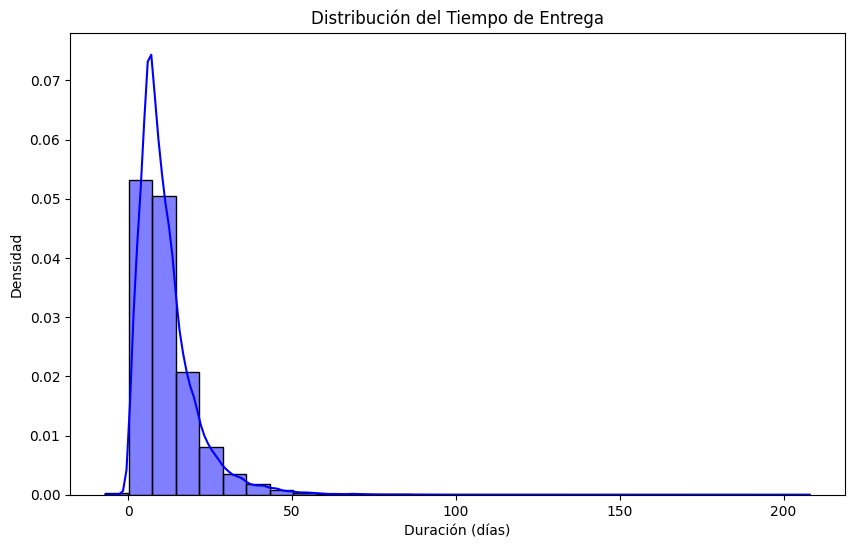

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_promedio['duracion'], kde=True, stat="density", bins=30, color='blue')

plt.title("Distribución del Tiempo de Entrega")
plt.xlabel('Duración (días)')
plt.ylabel('Densidad')
plt.show()

**Respuesta:** En mi opinión, es útil y relevante incluir percentiles, ya que estos están mínimamente sesgados por valores atípicos. Esto nos permite tener una visión más real de los datos y ver cuántos pedidos tienen más o menos demoras de lo que se espera, dado que el promedio está sesgado por valores atípicos; es por eso que se considera útil incluirlos.

Además, los percentiles 90 y 75 nos ofrecen información específica sobre cómo se distribuyen los datos en diferentes puntos de la distribución. El percentil 75 nos indica el punto en el que el 75% de los datos están por debajo o son iguales a ese valor, lo que nos da una idea clara de cuántos pedidos se entregan dentro de un cierto límite de tiempo. 

Por otro lado, el percentil 90 nos muestra cuántos pedidos pueden experimentar demoras y cuánto más tiene en demora ese 10% restante, lo que nos permite identificar áreas en las que se pueden enfocar esfuerzos para mejorar la eficiencia del proceso de entrega.

In [15]:
df_promedio.to_excel('../Datasets/df_percentiles.xlsx',index=False)

## 3) Propón al menos un indicador para medir el rendimiento de entrega de las órdenes, dado el compromiso hecho con el cliente.


In [9]:
df_kpi = pd.DataFrame({ 'fecha_entrega': order['order_delivered_to_customer_date'],
'fecha_prometida': order['order_delivery_promise_date'] })

df_kpi['tiempo_entrega'] = df_kpi['fecha_entrega'] - df_kpi['fecha_prometida'] 
df_kpi['tiempo_entrega'] = df_kpi['tiempo_entrega'].dt.days
df_kpi = df_kpi.dropna(subset=['tiempo_entrega'])

df_kpi['tiempo_entrega'] = df_kpi['tiempo_entrega'].astype(int)

df_kpi['Entregado a tiempo'] = df_kpi['tiempo_entrega'] <= 0

A_tiempo = df_kpi['Entregado a tiempo'].value_counts().get(True)
Retraso = df_kpi['Entregado a tiempo'].value_counts().get(False)

indicador = (A_tiempo/len(df_kpi['Entregado a tiempo'])*100)

print(f"Cantidad de ordenes que fueron entregadas a tiempo: {A_tiempo}")
print(f"Cantidad de ordenes que NO fueron entregadas a tiempo: {Retraso}")
print(f"Indicador de cumplimiento de entrega: {round(indicador,2)}")

Cantidad de ordenes que fueron entregadas a tiempo: 89927
Cantidad de ordenes que NO fueron entregadas a tiempo: 6535
Indicador de cumplimiento de entrega: 93.23


**Respuesta:** Se creó el KPI Cumplimiento de Entrega, cuya fórmula es:   

                        (Nro. de ordenes entregadas a tiempo / Total de ordenes) *100                                           

Este KPI se planteó de la siguiente manera: se tomaron dos columnas que nos podían dar un valor en tiempo de si se entregaba o no en tiempo y forma la orden.

Entonces, se procedió a restar ambas columnas: Fecha_entrega - Fecha_prometida. En base al resultado, se creó otra columna dentro del DataFrame para que si el valor era verdadero, es decir, si se había entregado dentro del tiempo pactado, o falso para el caso en que fuera fuera de este tiempo pactado. Se contaron los valores verdaderos y se los dividió por el total de registros de esa columna, para luego multiplicarlo por 100 y obtener el porcentaje del indicador. Así cuantificamos los cumplimientos en tiempo de entrega.

## 4) Basándote en el punto anterior, ¿cuáles son los tres estados con el mejor rendimiento de entrega? 

Se unirán los DataFrames a través del identificador de cliente (customer_id) que tenemos, para poder extraer en qué estados son mejores los cumplimientos de entrega.

In [10]:
df_unido = pd.merge(customer, order, on='customer_id', how='right')
df_unido.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_municipality,customer_state,order_id,order_status,order_approved_at,order_received_by_local_operator_date,order_delivered_to_customer_date,order_delivery_promise_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Se realizó un procedimiento similar al anterior, en el que se vuelve a calcular si se cumplió con el tiempo pactado de entrega o no, pero con toda la información en un solo dataset, lo cual nos permite una mejor manipulación de los datos.

In [11]:
df_unido['tiempo_entrega'] = df_unido['order_delivered_to_customer_date'] - df_unido['order_delivery_promise_date'] 
df_unido['tiempo_entrega'] = df_unido['tiempo_entrega'].dt.days
df_unido = df_unido.dropna(subset=['tiempo_entrega'])

df_unido['tiempo_entrega'] = df_unido['tiempo_entrega'].astype(int)
df_unido['Entregado a tiempo'] = df_unido['tiempo_entrega'] <= 0

Revisamos si se generaron nulos, dado que previamente se realizó un 'right join', lo que significa que si no teníamos clientes que hayan realizado órdenes, fueron eliminados del DataFrame para quedarnos solo con aquellos de los que tenemos información sobre sus estados.

In [12]:
Funciones.analizar_datos(df_unido)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,customer_id,[<class 'str'>],100.00,0.00,0
1,customer_unique_id,"[<class 'str'>, <class 'float'>]",96.67,3.33,3215
2,customer_zip_code_prefix,[<class 'float'>],96.67,3.33,3215
3,customer_municipality,"[<class 'str'>, <class 'float'>]",96.67,3.33,3215
4,customer_state,"[<class 'str'>, <class 'float'>]",96.67,3.33,3215
5,order_id,[<class 'str'>],100.00,0.00,0
6,order_status,[<class 'str'>],100.00,0.00,0
7,order_approved_at,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
8,order_received_by_local_operator_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,1
9,order_delivered_to_customer_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0


Se eliminaron los valores nulos y ahora se verifica que la información esté lista para exportar.

In [13]:
df_unido_sin_nulos = df_unido.dropna(subset=['customer_unique_id', 'customer_zip_code_prefix', 'customer_municipality', 'customer_state'])
Funciones.analizar_datos(df_unido_sin_nulos)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,customer_id,[<class 'str'>],100.0,0.0,0
1,customer_unique_id,[<class 'str'>],100.0,0.0,0
2,customer_zip_code_prefix,[<class 'float'>],100.0,0.0,0
3,customer_municipality,[<class 'str'>],100.0,0.0,0
4,customer_state,[<class 'str'>],100.0,0.0,0
5,order_id,[<class 'str'>],100.0,0.0,0
6,order_status,[<class 'str'>],100.0,0.0,0
7,order_approved_at,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
8,order_received_by_local_operator_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,1
9,order_delivered_to_customer_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0


Se prepararon los datos para poder ejecutar la respuesta en Tableau, teniendo en cuenta que es más sencillo de utilizar y obtener el valor de una visualización. Luego, exportamos el Excel con los datasets unidos.

In [14]:
df_unido_sin_nulos.to_excel('../Datasets/df_unido_sin_nulos.xlsx',index=False)

Luego de realizar el grafico en tableau, lo pegaremos aqui para tener una vista completa de los ejercicios y los resultados.

![imagen](../Imagenes/Tres_estados.png)

## 5) ¿Identificas algún patrón geográfico en los retrasos de entrega? ¿Son estos patrones consistentes con el tiempo?

A su vez, hemos creado otro gráfico del tipo mapa para poder visualizar cómo se comportan las demoras en los diferentes años y si obtenemos algún patrón.

![imagen2](../Imagenes/Demoras_tiempo.png)

A simple vista no podemos identificar cuáles son los estados con más demoras, así que creamos una tabla para una mejor visualización de los números.

![imagen3](../Imagenes/tabla_estados.png)

Rápidamente podemos observar que tenemos los mismos estados que teníamos antes en cuanto a quién era el que mejor poseía en cuanto a entregas. Esto se debe a que son los 3 estados con más pedidos generados: Minas Gerais, Rio de Janeiro y Sao Paulo. 

Lo que probablemente esté generando el problema es que estos 3 estados son los que más población tienen, lo que genera un tráfico intenso y sobrecarga la infraestructura en pedidos de bienes, lo que no permite cumplir con los tiempos de entrega comprometidos. Además, se producen cuellos de botella debido a la infraestructura.

Se debería hacer un estudio más a fondo para lo cual se necesitaría más información al momento de plantear soluciones en este tema.

**Respuesta:** Se puede ver un patrón de aumento en las demoras, el cual incluye los tres estados mencionados anteriormente: Minas Gerais, Rio de Janeiro y Sao Paulo, ubicados en el sudeste de Brasil, siendo unas de las áreas económicas más importantes del país.

Esto se mantiene con el tiempo, en exactamente los mismos estados, como se puede ver en las imágenes.

Para respaldar en cuanto a la cantidad de pedidos que realiza cada estado y su demora, vemos que se vuelve a cumplir lo mismo que antes. Esto se debe a que la gran mayoría de pedidos se realizan en esos tres estados. Adjunto una imagen del gráfico.

En esta [URL](https://www.ambito.com/informacion-general/brasil-tiene-203-millones-habitantes-10-millones-menos-lo-estimado-segun-censo-n5756810) de una noticia se puede corroborar lo dicho anteriormente sobre los estados más poblados de Brasil.

![imagen4](../Imagenes/Estados_ordens.png)

## 6) ¿Qué iniciativas propones para mejorar los tiempos de entrega y el rendimiento? Clasifica estas iniciativas según la prioridad que les darías para su implementación y justifica.

1) Optimización de Rutas con IA:

La tecnología para la optimización de rutas no es costosa y puede proporcionar una reducción en los tiempos de entrega y los costos operativos. Herramientas como GPS avanzados y aplicaciones de gestión de flotas pueden mejorar la eficiencia logística.

Para implementarlo, se debe invertir en software de optimización de rutas accesible y capacitar al personal en su uso. Esto puede generar un retorno de inversión (ROI) significativo en términos de desgaste de vehículos, ahorro de combustible y tiempo de trabajo.

2) Automatización de Procesos Clave:

La automatización de procesos específicos dentro de los almacenes, como el empaque, etiquetado de envío o documentación, puede mejorar la eficiencia sin requerir una inversión grande.

Para implementarlo, se debería invertir en herramientas de automatización accesibles, como escáneres de código de barras y sistemas de gestión de almacenes (WMS) para tener un seguimiento preciso de la ubicación de nuestros productos, y capacitar al personal para su uso.

3) Diversificación de los Modos de Transporte:

Utilizar múltiples modos de transporte puede aumentar la flexibilidad y reducir los tiempos de entrega. Es especialmente útil en áreas donde el tráfico es un problema importante. Sin embargo, esto funcionaría siempre que el producto tenga un tamaño relativamente mediano para ser entregado, por ejemplo, en motocicletas.

Para implementarlo, se debería establecer relaciones con proveedores de servicios logísticos que ofrezcan opciones de transporte terrestre, aéreo y marítimo. Luego, se deben evaluar los costos y beneficios de cada modalidad y ajustar las estrategias de envío en consecuencia.